In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

print("Libraries import Sucessfully")


Libraries import Sucessfully


In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
print("Dataset loaded successfully.\n")
print("Shape of the dataset:", df.shape)
df.head()

Dataset loaded successfully.

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Missing Values in each column")
print(df.isnull().sum())

print("\n Data type of each column")
print(df.dtypes)

print("\nStatstical summary of numerical features:")
df.describe()

Missing Values in each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Data type of each column
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Statstical summary of numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


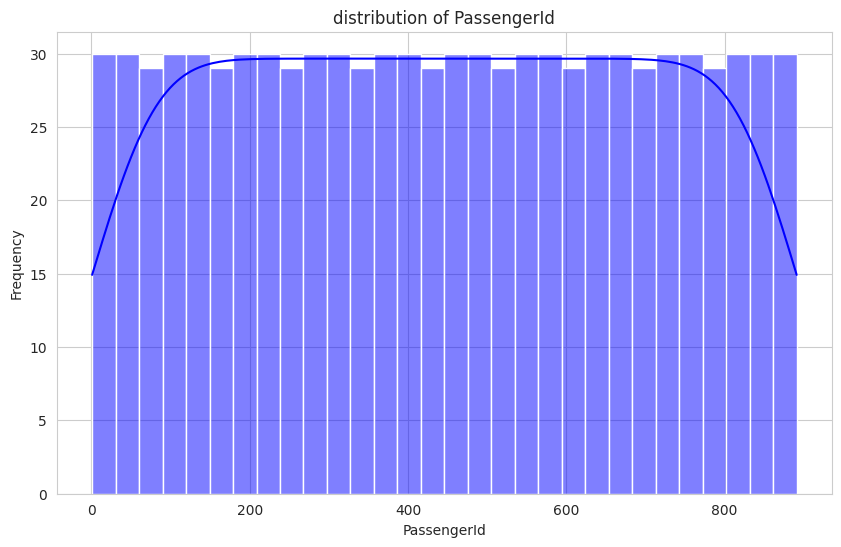

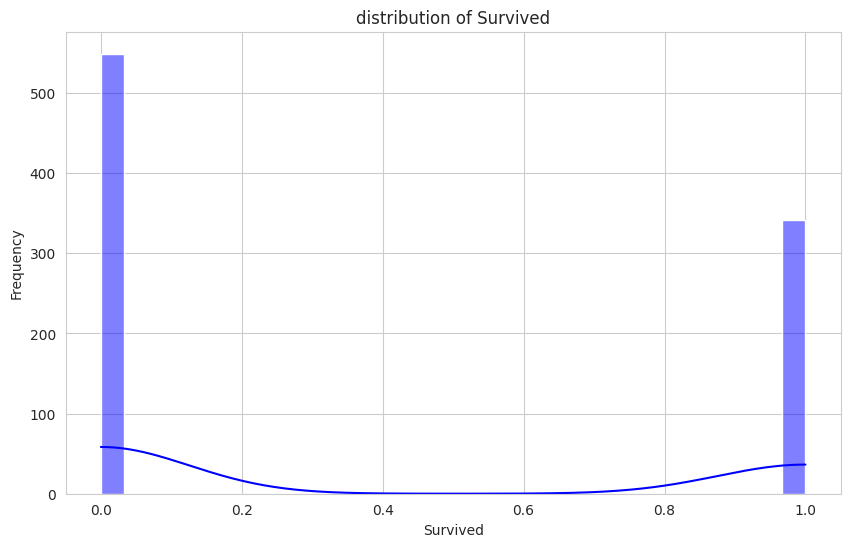

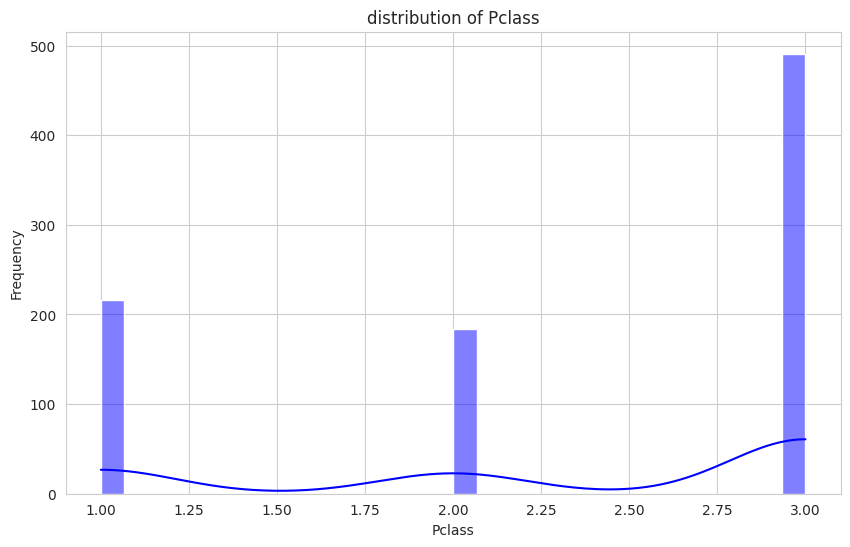

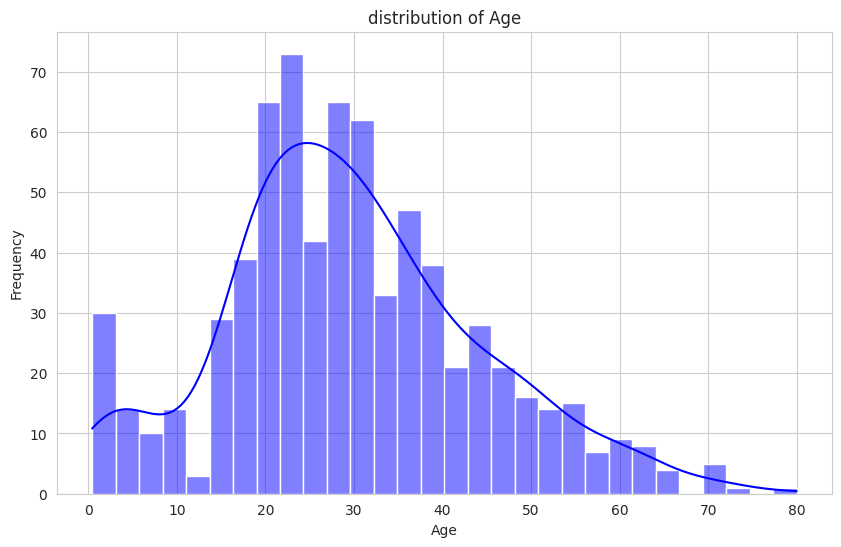

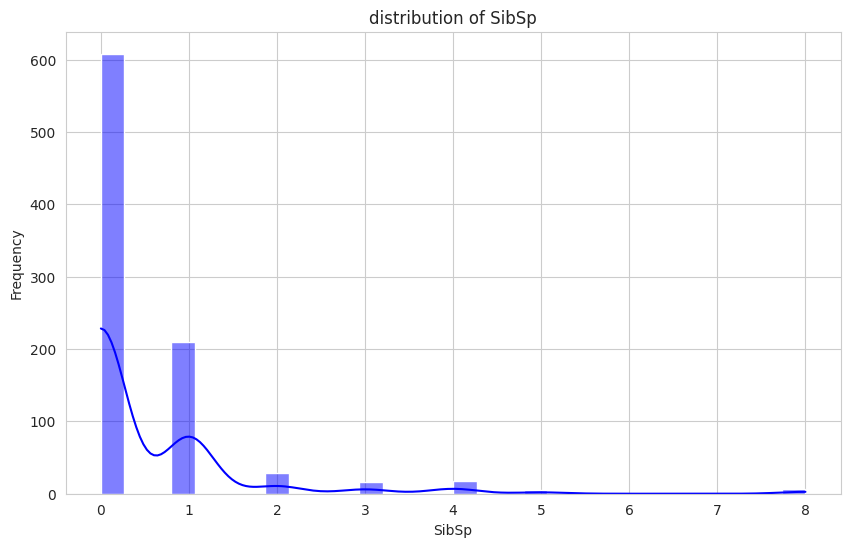

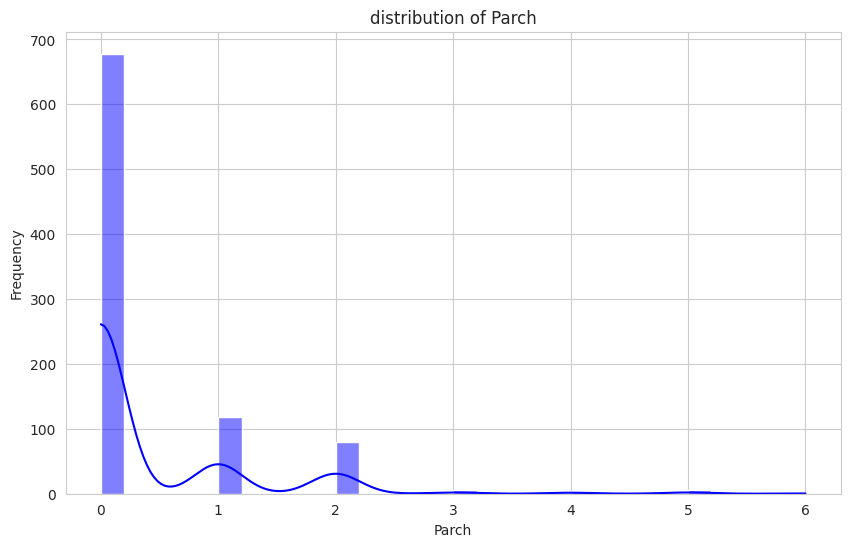

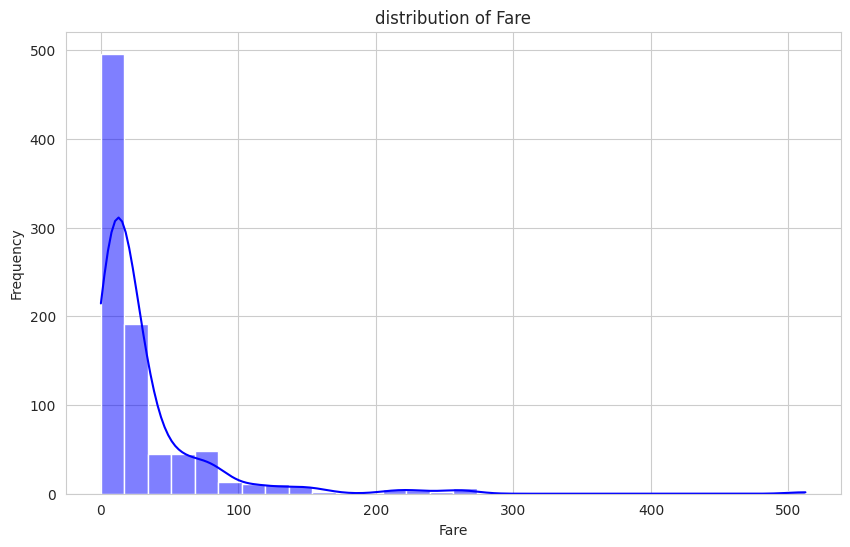

In [ ]:
numerical_cols= df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure()
  sns.histplot(df[col],kde=True, color="blue", bins=30)
  plt.title(f"distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

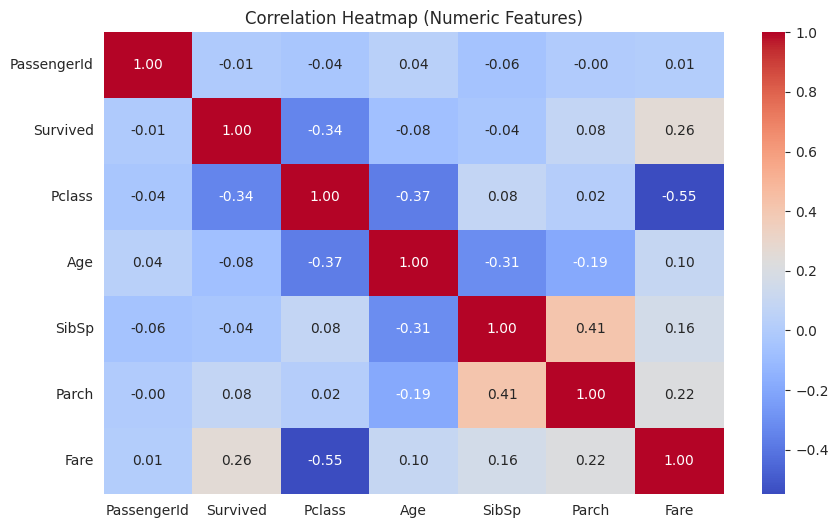

In [ ]:
  numeric_df = df.select_dtypes(include=np.number)
  if not numeric_df.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()
  else:
    print("No numeric columns found for correlation heatmap.")

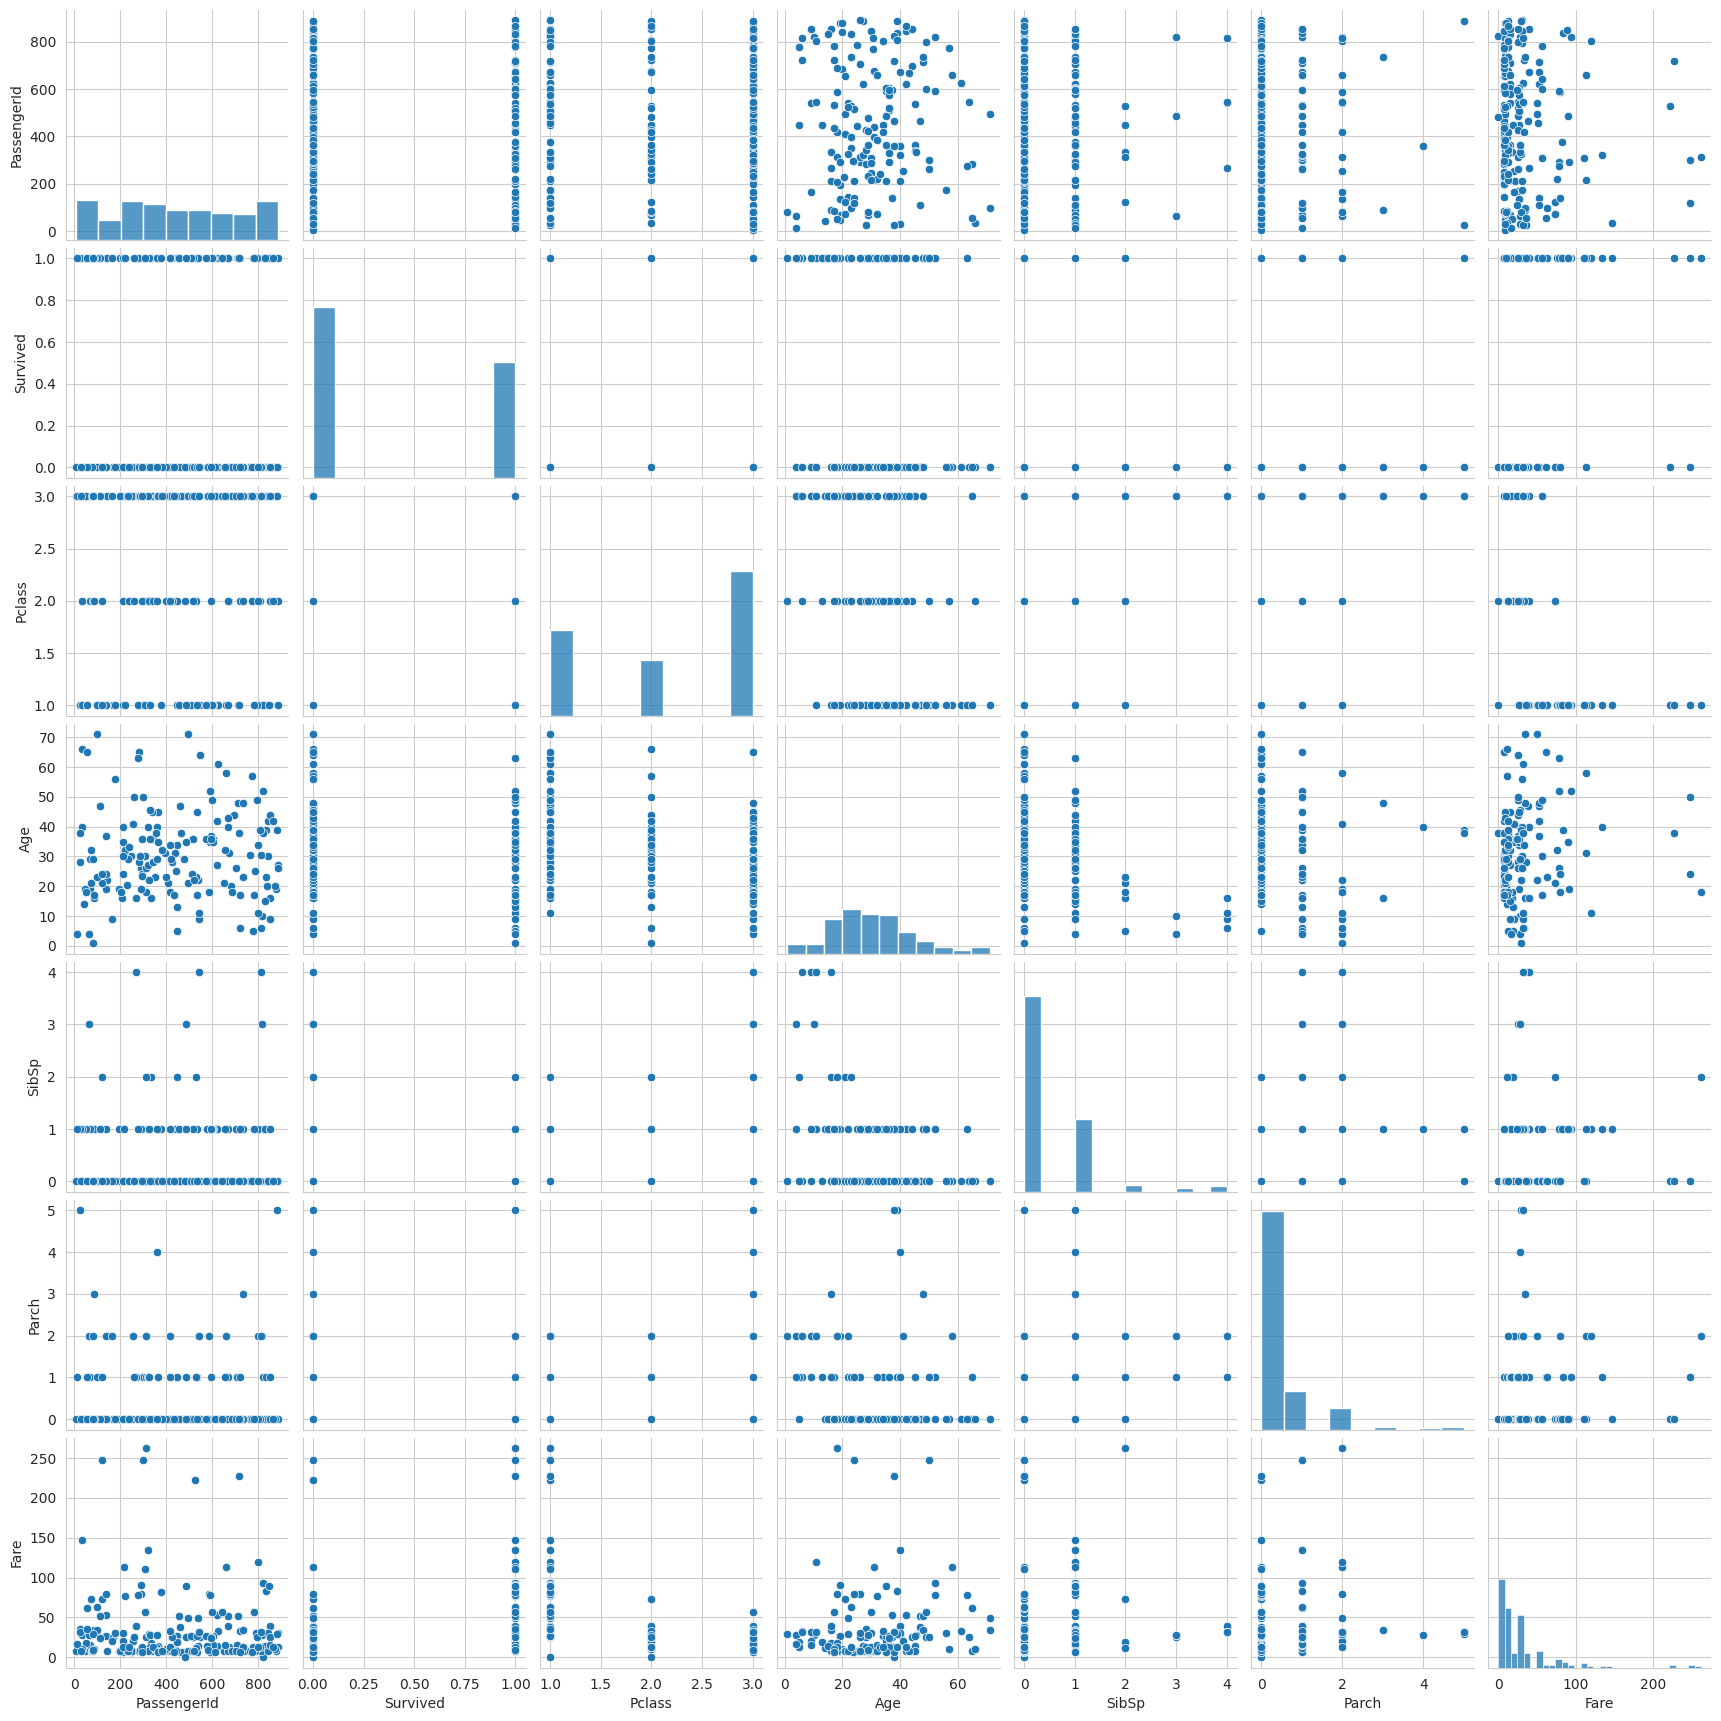

In [ ]:
if len(df)>200:
  df_sample= df.sample (200,random_state=42)
else:
  df_sampel=df

sns.pairplot(df_sample)
plt.show()




In [ ]:
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
# df.drop('Cabin', axis=1, inplace=True)

df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
y = df['Survived']

# Convert categorical 'Sex' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8044692737430168


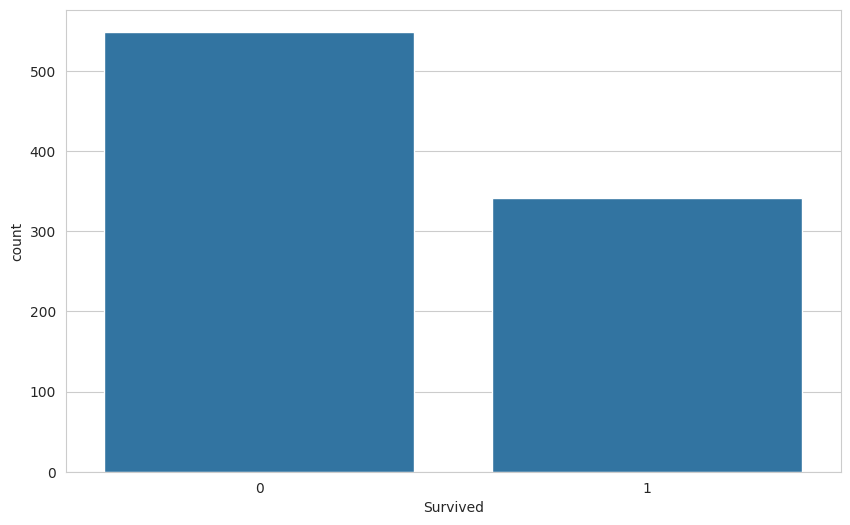

In [ ]:
sns.countplot(x='Survived', data=df)
plt.show()
